# RESACsub DEMO
### Import

In [1]:
from architecture import *
from train import *
from score import * 
from metrics import *
from plot_utils import *
from preprocess_data import *


2022-02-03 10:59:23.086118: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### Path & Data
This is a short test of 4 models on reduce data

In [2]:

print("Loadind reduced data")

#load DATA
SSH_R03=np.load("Data/SSH_R03.npy")
SSH_R09=np.load("Data/SSH_R09.npy")
SSH_R27=np.load("Data/SSH_R27.npy")
SSH_R81=np.load("Data/SSH_R81.npy")

SST_R03=np.load("Data/SST_R03.npy")
SST_R09=np.load("Data/SST_R09.npy")
SST_R27=np.load("Data/SST_R27.npy")
SST_R81=np.load("Data/SST_R81.npy")


Loadind reduced data


In [6]:
num=0 #which day you want to predict. 0,1,2,3

plot_line([SSH_R81[num,:,:,:],SSH_R27[num,:,:,:],SSH_R09[num,:,:,:],SSH_R03[num,:,:,:]],["SSH R81","SSH R27","SSH R09","SSH R03"], cmap=None, save_name="ssh",label="SSH(m)",shrink=0.3,center_colormap=False)
plot_line([SST_R81[num,:,:,:],SST_R27[num,:,:,:],SST_R09[num,:,:,:],SST_R03[num,:,:,:]],["SST R81","SST R27","SST R09","SST R03"], cmap="coolwarm", save_name="sst",label="SST(°C)",shrink=0.3,center_colormap=False)


IN=[SSH_R81[num:num+1,:,:,:],SST_R27[num:num+1,:,:,:],SST_R09[num:num+1,:,:,:],SST_R03[num:num+1,:,:,:]]
OUT=[SSH_R27[num:num+1,:,:,:],SSH_R09[num:num+1,:,:,:],SSH_R03[num:num+1,:,:,:]]


# Load models and predict

In [7]:


#load the Resac architectures

RESAC=reload_model("RESAC")
RESACsub_BN=reload_model("RESACsub BN")
RESACsub_supBNsub=reload_model("RESACsub supBNsub")

Denoiser=reload_denoising_model("Denoising network")
Denoiser.summary()

IN,OUT=RESAC.apply_normalization(IN, OUT)
# plot_line(IN,["SSH R81","SST R27","SST R09","SST R03"], cmap=None, save_name="sst",label="SST(°C)",shrink=0.3,center_colormap=False)

#make prediction
PRED=[]
PRED.append(np.flip(inv_normR03(RESAC.model.predict(IN)[-1][0])))
PRED.append(np.flip(inv_normR03(RESACsub_BN.model.predict(IN)[-1][0])))
PRED.append(np.flip(inv_normR03(RESACsub_supBNsub.model.predict(IN)[-1][0])))
PRED.append(np.flip(inv_normR03(Denoiser.predict(RESACsub_supBNsub.model.predict(IN)[-1])[0])))
PRED.append(np.flip(inv_normR03(OUT[-1][0])))


2022-02-03 11:00:42.595977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-03 11:00:42.596229: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 4000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 387.49GiB/s
2022-02-03 11:00:42.596261: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-03 11:00:42.596275: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-03 11:00:42.596286: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-03 11:00:42.596296: I tensorflow/stream_executor/platfo

Loaded model json file at : /home/pequan2/archambault/local/Save2/RESAC/architecture/

***************
INPUT for model test2 :
IN 1  :	type = SSH 	res = R81 	normalization = MinMaxScaler
IN 2  :	type = SST 	res = R27 	normalization = MinMaxScaler
IN 3  :	type = SST 	res = R09 	normalization = MinMaxScaler
IN 4  :	type = SST 	res = R03 	normalization = MinMaxScaler
***************


***************
OUTPUT for model test2 :
OUT 1  : type =  SSH 	res = R27 	normalization = MinMaxScaler 	loss = mse
OUT 2  : type =  SSH 	res = R09 	normalization = MinMaxScaler 	loss = mse
OUT 3  : type =  SSH 	res = R03 	normalization = MinMaxScaler 	loss = mse
***************

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_49 (InputLayer)           [(None, 16, 16, 1)]  0                                            
____________________

Loaded model json file at : /home/pequan2/archambault/local/Save2/RESACsub BN/architecture/

***************
INPUT for model EXP13subpix_withoutsubBNsub2 :
IN 1  :	type = SSH 	res = R81 	normalization = MinMaxScaler
IN 2  :	type = SST 	res = R27 	normalization = MinMaxScaler
IN 3  :	type = SST 	res = R09 	normalization = MinMaxScaler
IN 4  :	type = SST 	res = R03 	normalization = MinMaxScaler
***************


***************
OUTPUT for model EXP13subpix_withoutsubBNsub2 :
OUT 1  : type =  SSH 	res = R27 	normalization = MinMaxScaler 	loss = mse
OUT 2  : type =  SSH 	res = R09 	normalization = MinMaxScaler 	loss = mse
OUT 3  : type =  SSH 	res = R03 	normalization = MinMaxScaler 	loss = mse
***************

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_74 (InputLayer)           [(None, 16, 16, 1)]  0             

Loaded model json file at : /home/pequan2/archambault/local/Save2/RESACsub supBNsub/architecture/

***************
INPUT for model EPX10Subpix13 :
IN 1  :	type = SSH 	res = R81 	normalization = MinMaxScaler
IN 2  :	type = SST 	res = R27 	normalization = MinMaxScaler
IN 3  :	type = SST 	res = R09 	normalization = MinMaxScaler
IN 4  :	type = SST 	res = R03 	normalization = MinMaxScaler
***************


***************
OUTPUT for model EPX10Subpix13 :
OUT 1  : type =  SSH 	res = R27 	normalization = MinMaxScaler 	loss = mse
OUT 2  : type =  SSH 	res = R09 	normalization = MinMaxScaler 	loss = mse
OUT 3  : type =  SSH 	res = R03 	normalization = MinMaxScaler 	loss = mse
***************

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 16, 16, 1)]  0                                      

2022-02-03 11:00:44.509955: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-03 11:00:44.526315: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz
2022-02-03 11:00:44.855006: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-03 11:00:45.582575: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-03 11:00:45.616860: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-02-03 11:00:46.172415: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


# Plot prediction

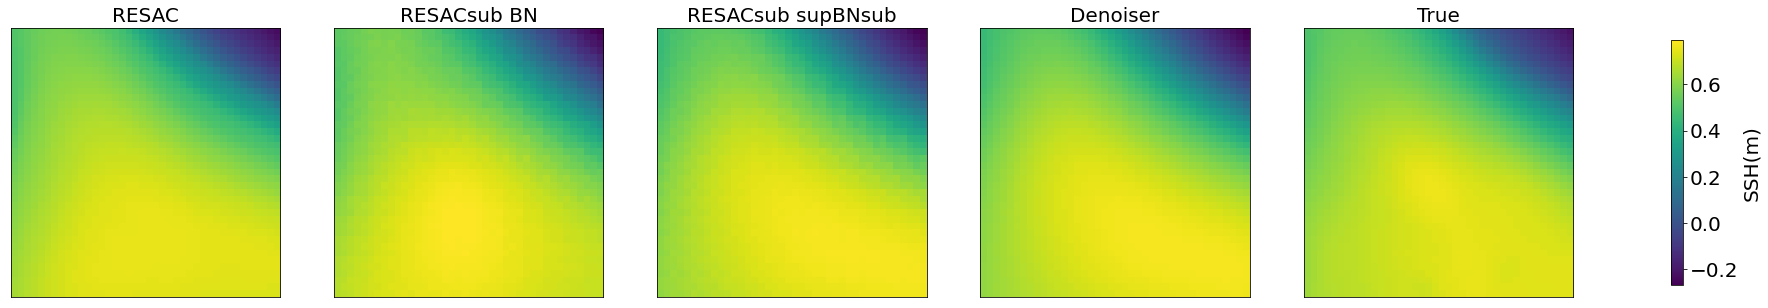

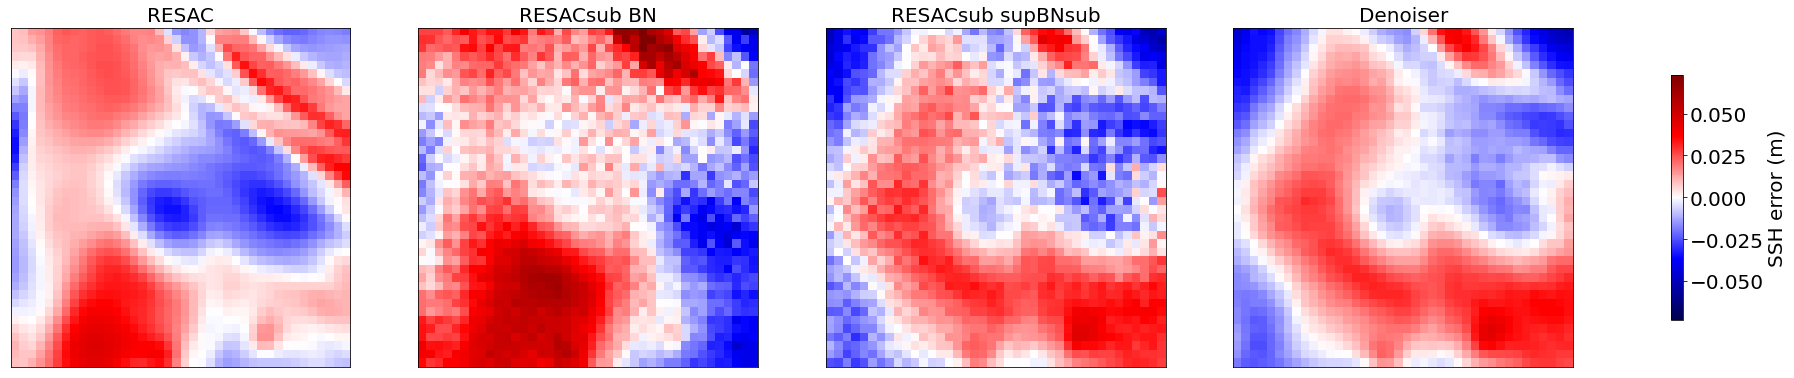

In [9]:

a,b,c,d=120,160,120,160
pred=[]
diff=[]
pred_zoom=[]
diff_zoom=[]

for k in range (len(PRED)):
    pred.append(PRED[k])
    diff.append(PRED[k]-PRED[-1])
    pred_zoom.append(PRED[k][a:b,c:d])
    diff_zoom.append(PRED[k][a:b,c:d]-PRED[-1][a:b,c:d])

diff=diff[0:-1]
diff_zoom=diff_zoom[0:-1]

plot_line(pred,["RESAC","RESACsub BN","RESACsub supBNsub","Denoiser","True"], cmap=None, save_name="ssh",label="SSH(m)",shrink=0.3,center_colormap=False)
plot_line(diff,["RESAC","RESACsub BN","RESACsub supBNsub","Denoiser"], cmap="seismic", save_name="ssh",label="SSH error (m)",shrink=0.3,center_colormap=True)
plot_line(pred_zoom,["RESAC","RESACsub BN","RESACsub supBNsub","Denoiser","True"], cmap=None, save_name="ssh",label="SSH(m)",shrink=0.3,center_colormap=False)
plot_line(diff_zoom,["RESAC","RESACsub BN","RESACsub supBNsub","Denoiser"], cmap="seismic", save_name="ssh",label="SSH error (m)",shrink=0.3,center_colormap=True)